# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [83]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

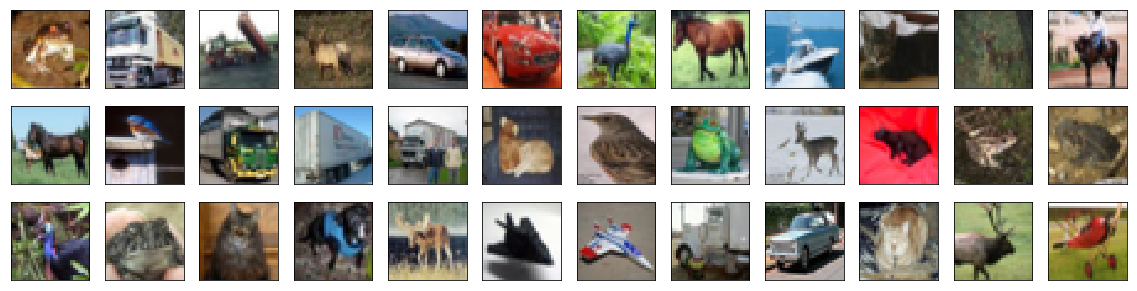

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [85]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [86]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [87]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU

model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=.001))   # add an advanced activation
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 128)       73856     
__________

### 6. Compile the Model 

In [88]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [96]:
from keras.callbacks import ModelCheckpoint   
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.50325, saving model to model.weights.best.hdf5
9s - loss: 0.2643 - acc: 0.9056 - val_loss: 0.5032 - val_acc: 0.8360
Epoch 2/100
Epoch 00001: val_loss did not improve
9s - loss: 0.2619 - acc: 0.9062 - val_loss: 0.5121 - val_acc: 0.8256
Epoch 3/100
Epoch 00002: val_loss did not improve
9s - loss: 0.2540 - acc: 0.9087 - val_loss: 0.5100 - val_acc: 0.8348
Epoch 4/100
Epoch 00003: val_loss did not improve
9s - loss: 0.2478 - acc: 0.9104 - val_loss: 0.5207 - val_acc: 0.8314
Epoch 5/100
Epoch 00004: val_loss did not improve
9s - loss: 0.2457 - acc: 0.9124 - val_loss: 0.5202 - val_acc: 0.8282
Epoch 6/100
Epoch 00005: val_loss did not improve
9s - loss: 0.2413 - acc: 0.9136 - val_loss: 0.5373 - val_acc: 0.8292
Epoch 7/100
Epoch 00006: val_loss did not improve
9s - loss: 0.2372 - acc: 0.9146 - val_loss: 0.5112 - val_acc: 0.8348
Epoch 8/100
Epoch 00007: val_loss did not improve
9s - loss: 0.2

Epoch 00068: val_loss did not improve
9s - loss: 0.0879 - acc: 0.9691 - val_loss: 0.5937 - val_acc: 0.8402
Epoch 70/100
Epoch 00069: val_loss did not improve
9s - loss: 0.0904 - acc: 0.9687 - val_loss: 0.5882 - val_acc: 0.8376
Epoch 71/100
Epoch 00070: val_loss did not improve
9s - loss: 0.0922 - acc: 0.9680 - val_loss: 0.6006 - val_acc: 0.8378
Epoch 72/100
Epoch 00071: val_loss did not improve
9s - loss: 0.0902 - acc: 0.9683 - val_loss: 0.5901 - val_acc: 0.8402
Epoch 73/100
Epoch 00072: val_loss did not improve
9s - loss: 0.0845 - acc: 0.9706 - val_loss: 0.6062 - val_acc: 0.8370
Epoch 74/100
Epoch 00073: val_loss did not improve
9s - loss: 0.0920 - acc: 0.9681 - val_loss: 0.6253 - val_acc: 0.8372
Epoch 75/100
Epoch 00074: val_loss did not improve
9s - loss: 0.0844 - acc: 0.9710 - val_loss: 0.5774 - val_acc: 0.8388
Epoch 76/100
Epoch 00075: val_loss did not improve
8s - loss: 0.0832 - acc: 0.9702 - val_loss: 0.6441 - val_acc: 0.8320
Epoch 77/100
Epoch 00076: val_loss did not improve
9s

### 8. Load the Model with the Best Validation Accuracy

In [97]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [98]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8193


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [99]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

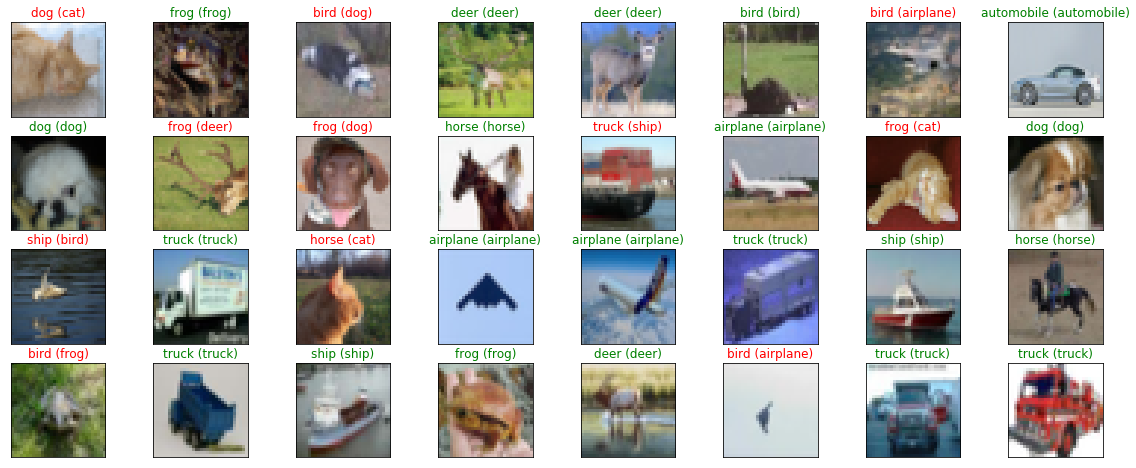

In [100]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))